# Assignment - Multiple Linear Regression (Bike Sharing Data)
## Problem Statement

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.<br>
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.<br> 
In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.<br>
They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. <br>The company wants to know:

1. Which variables are significant in predicting the demand for shared bikes.
2. How well those variables describe the bike demands<br>

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.


## Business Goal

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step 1: Reading and Understanding the Data

### Importing necessary libraries required for the analysis and model building


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler)
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Dictionary 

### Dataset characteristics
day.csv have the following fields:
	
	- instant: record index
	- dteday : date
	- season : season (1:spring, 2:summer, 3:fall, 4:winter)
	- yr : year (0: 2018, 1:2019)
	- mnth : month ( 1 to 12)
	- holiday : weather day is a holiday or not (extracted from http://dchr.dc.gov/page/holiday-schedule)
	- weekday : day of the week
	- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
	+ weathersit : 
		- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
		- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
		- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
		- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
	- temp : temperature in Celsius
	- atemp: feeling temperature in Celsius
	- hum: humidity
	- windspeed: wind speed
	- casual: count of casual users
	- registered: count of registered users
	- cnt: count of total rental bikes including both casual and registered
	

### License

Use of this dataset in publications must be cited to the following publication:

[1] Fanaee-T, Hadi, and Gama, Joao, "Event labeling combining ensemble detectors and background knowledge", Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg, doi:10.1007/s13748-013-0040-3.

@article{
	year={2013},
	issn={2192-6352},
	journal={Progress in Artificial Intelligence},
	doi={10.1007/s13748-013-0040-3},
	title={Event labeling combining ensemble detectors and background knowledge},
	url={http://dx.doi.org/10.1007/s13748-013-0040-3},
	publisher={Springer Berlin Heidelberg},
	keywords={Event labeling; Event detection; Ensemble learning; Background knowledge},
	author={Fanaee-T, Hadi and Gama, Joao},
	pages={1-15}
}


### Contact

	
For further information about this dataset please contact Hadi Fanaee-T (hadi.fanaee@fe.up.pt)


In [3]:
df = pd.read_csv("day.csv")

print("Info:")
df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [4]:
print("Shape")
df.shape

Shape


(730, 16)

In [5]:
print("Description:")
df.describe()

Description:


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<div class="alert alert-block alert-info">
The data provide contains <b>16</b> Columns with <b>730</b> rows/values and <b>zero</b> non-nulls.</br>
We have four float, eleven int and one object dtype columns
</div>

In [6]:
print("Size:")
df.size

Size:


11680

In [7]:
df.drop_duplicates()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


<div class="alert alert-block alert-info">
Since the shape of the dataframe is same, we can conclude that the original data do not have any duplicates
</div>

In [8]:
df = df.drop(['registered','casual','instant'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


<div class="alert alert-block alert-info">
Dropping casual and registered as the target variable cnt is sum of both, so it would redundant in nature and cnt can be explained by this two variables only.
</div>

In [9]:
df['dteday']

0      01-01-2018
1      02-01-2018
2      03-01-2018
3      04-01-2018
4      05-01-2018
          ...    
725    27-12-2019
726    28-12-2019
727    29-12-2019
728    30-12-2019
729    31-12-2019
Name: dteday, Length: 730, dtype: object

In [10]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [11]:
df = df.drop('dteday',axis = 1)

<div class="alert alert-block alert-info">
Dropping dteday because we alreday have mnth and yr column which is enough for the model to learn on.
</div>

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


Dropping dteday as we have mnth and yr column already we with us.

In [13]:
df.shape

(730, 12)

<div class="alert alert-block alert-info">
Now the number of column is dropped to 12
</div>

In [14]:
df.season.replace((1,2,3,4),('Spring','Summer','Fall','Winter'),inplace=True)

In [15]:
df.mnth.replace((1,2,3,4,5,6,7,8,9,10,11,12),
                ('Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'),
                inplace=True)

In [16]:
df.weekday.replace((0,1,2,3,4,5,6),
                   ('Sun','Mon','Tue','Wed','Thu','Fri','Sat'),
                   inplace=True)

In [17]:
df.weathersit.replace((1,2,3,4),('Clear','Mist','Snow','Rain'),inplace=True)

<div class="alert alert-block alert-info">
Converting the columns which were numeric in but were categorical in nature to object dtype by adding the corresponding values from data dictionary
</div>

In [18]:
# df['season'] = df['season'].astype('category')
# df['mnth'] = df['mnth'].astype('category')
# df['weekday'] = df['weekday'].astype('category')
# df['weathersit'] = df['weathersit'].astype('category')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [20]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

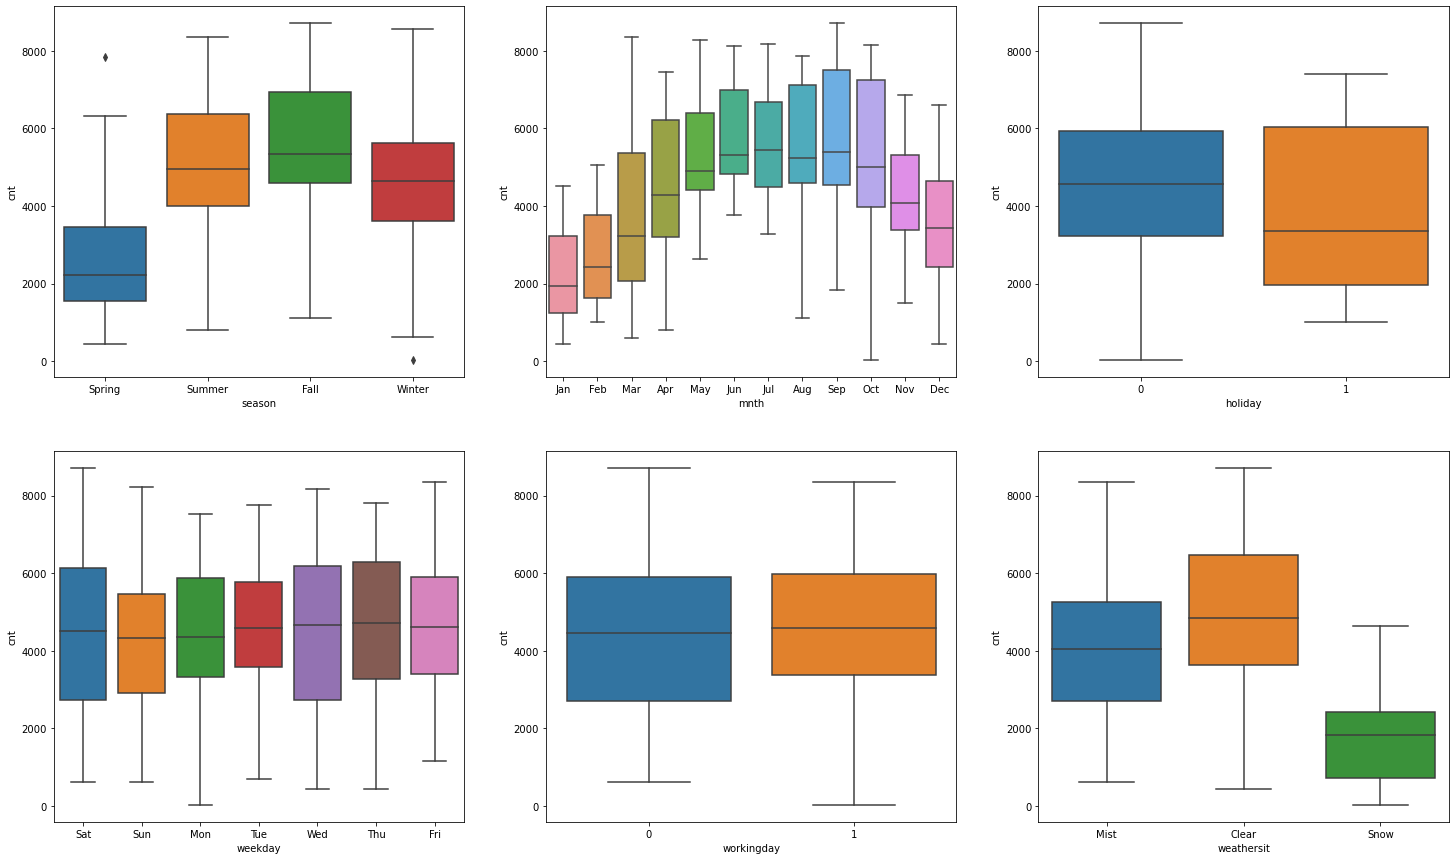

In [21]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
sns.boxplot(x = 'season',y = 'cnt',data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth',y = 'cnt',data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday',y = 'cnt',data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday',y = 'cnt',data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday',y = 'cnt',data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit',y = 'cnt',data = df)
plt.show()

----------------------------------------------------------

In [22]:
def get_stats(col):
    cat_df = df.groupby(col)['cnt'].agg(['sum', 'mean','median','count']).sort_values('sum',ascending = False)
    cat_df['percentage']=cat_df['sum']/df.cnt.sum()*100
    cat_df['occurence']=cat_df['count']/df.cnt.count()*100
    return round(cat_df,2)

In [23]:
def cat_plot(col,x,y):
    plt.figure(figsize = (x,y))
    plt.subplot(1,2,1)
    sns.barplot(col,'cnt',data=df)
    plt.subplot(1,2,2)
    sns.barplot(col,'cnt',data=df, hue='yr')
    plt.legend(labels=['2018', '2019'])
    return

In [24]:
get_stats('season')

,sum,mean,median,count,percentage,occurence
season,,,,,,
Fall,1061129,5644.30,5353.5,188,32.24,25.75
Summer,918589,4992.33,4941.5,184,27.91,25.21
Winter,841613,4728.16,4634.5,178,25.57,24.38
Spring,469514,2608.41,2222.5,180,14.27,24.66


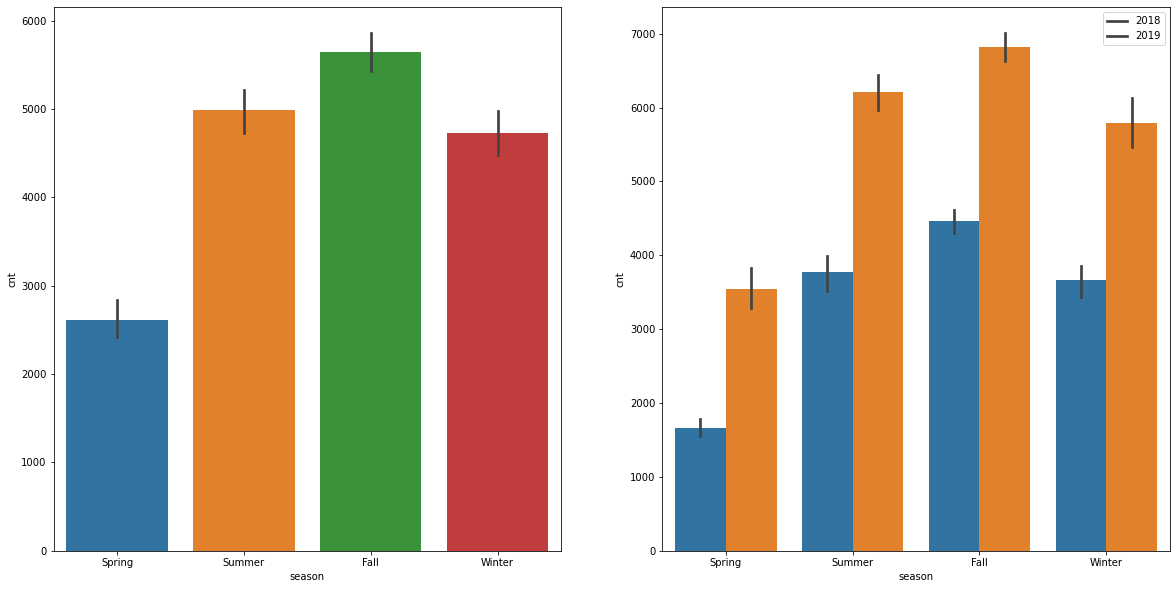

In [25]:
cat_plot('season',20,10)

<div class="alert alert-block alert-info">
<b>Insights</b> </br>
- Most of the bike booking is done in the season of "Fall" with almost 32% having a median of 5300 bookings for 2018 and 2019
- Fall is followed by Summer with 28% of total bookings and a median of 5000 bookings
</div>

In [26]:
get_stats('mnth')

,sum,mean,median,count,percentage,occurence
mnth,,,,,,
Aug,351194,5664.42,5229.5,62,10.67,8.49
Jun,346342,5772.37,5308.5,60,10.52,8.22
Sep,345991,5766.52,5384.0,60,10.51,8.22
Jul,344948,5563.68,5446.5,62,10.48,8.49
May,331686,5349.77,4890.5,62,10.08,8.49
Oct,322352,5199.23,5013.0,62,9.80,8.49
Apr,269094,4484.90,4293.5,60,8.18,8.22
Nov,254831,4247.18,4081.0,60,7.74,8.22
Mar,228920,3692.26,3216.5,62,6.96,8.49


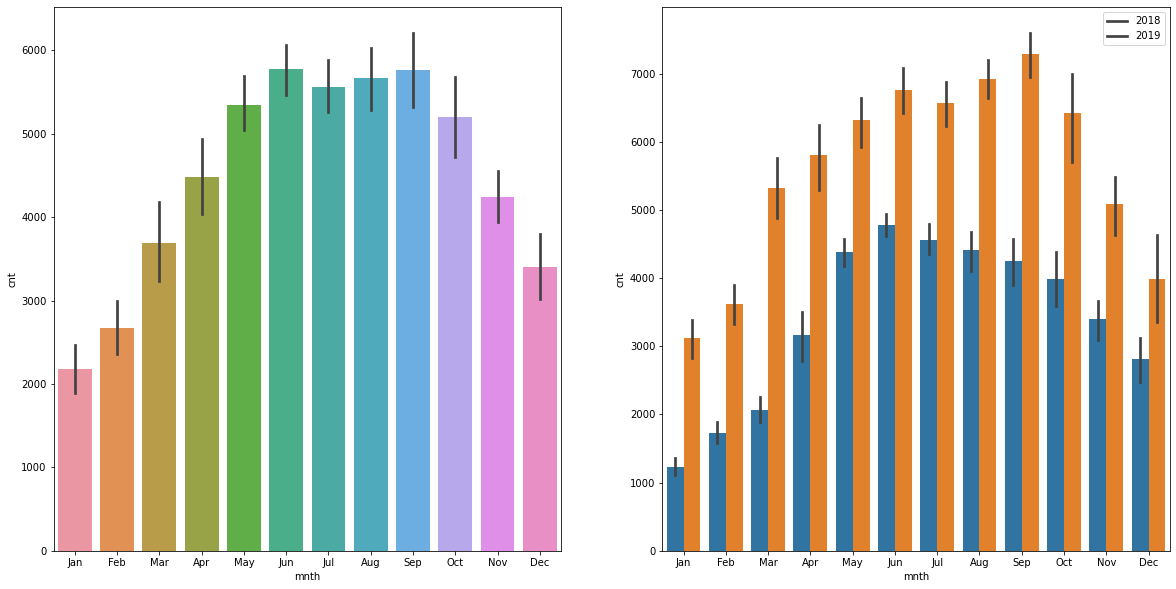

In [27]:
cat_plot('mnth',20,10)

<div class="alert alert-block alert-info">
<b>Insights</b> </br>
- Most of the bookings are done from the Month of May till September with almost 10% each of the entire data and also with a median of 5000 bookings
</div>

In [28]:
get_stats('holiday')

,sum,mean,median,count,percentage,occurence
holiday,,,,,,
0,3212410,4530.9,4563.0,709,97.62,97.12
1,78435,3735.0,3351.0,21,2.38,2.88


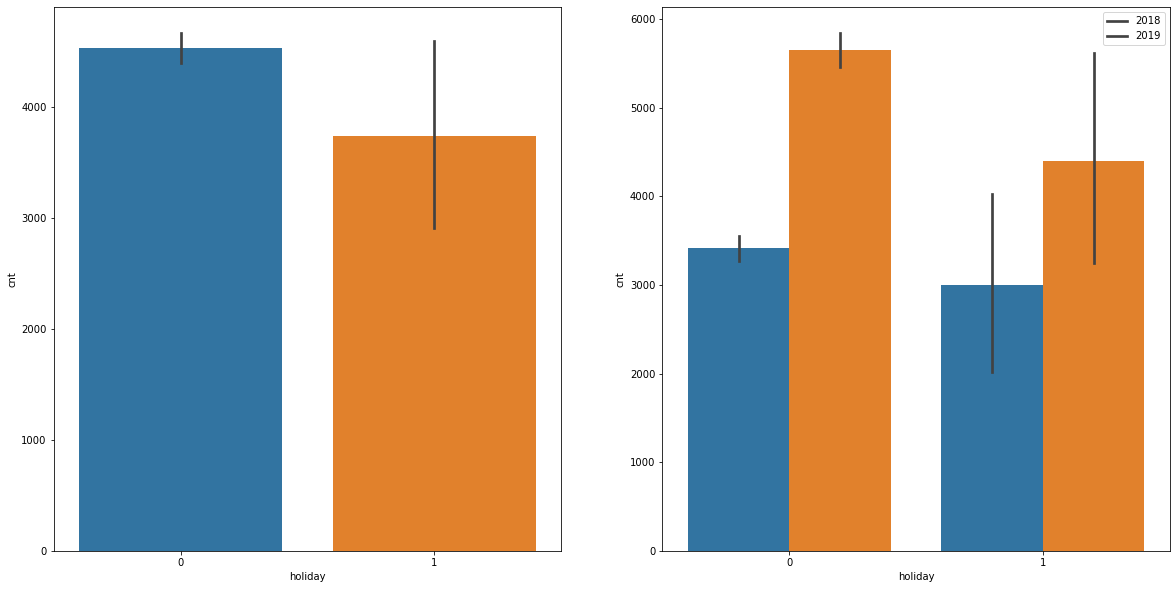

In [29]:
cat_plot('holiday',20,10)

<div class="alert alert-block alert-info">
<b>Insights</b> </br>
- More than 97% of total bookings are done on non-holidays with a median of 4500 bookings.
</div>

In [30]:
get_stats('weekday')

,sum,mean,median,count,percentage,occurence
weekday,,,,,,
Fri,487790,4690.29,4601.5,104,14.82,14.25
Thu,485395,4667.26,4721.0,104,14.75,14.25
Sat,477807,4550.54,4521.0,105,14.52,14.38
Wed,471214,4574.89,4656.0,103,14.32,14.11
Tue,469109,4510.66,4576.5,104,14.25,14.25
Mon,455503,4338.12,4359.0,105,13.84,14.38
Sun,444027,4228.83,4334.0,105,13.49,14.38


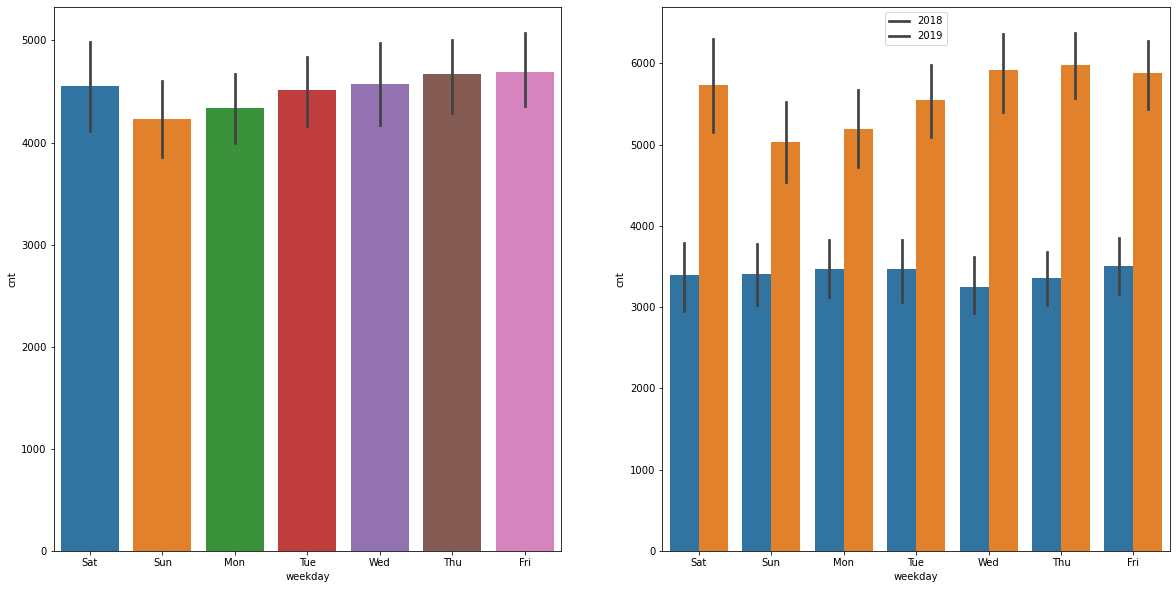

In [31]:
cat_plot('weekday',20,10)

<div class="alert alert-block alert-info">
<b>Insights</b> </br>
- The weekday variable shows almost similar trend, as percentage of booking ranges from 13.5% - 14.8%.
</div>

In [32]:
get_stats('workingday')

,sum,mean,median,count,percentage,occurence
workingday,,,,,,
1,2290576,4590.33,4585.0,499,69.6,68.36
0,1000269,4330.17,4459.0,231,30.4,31.64


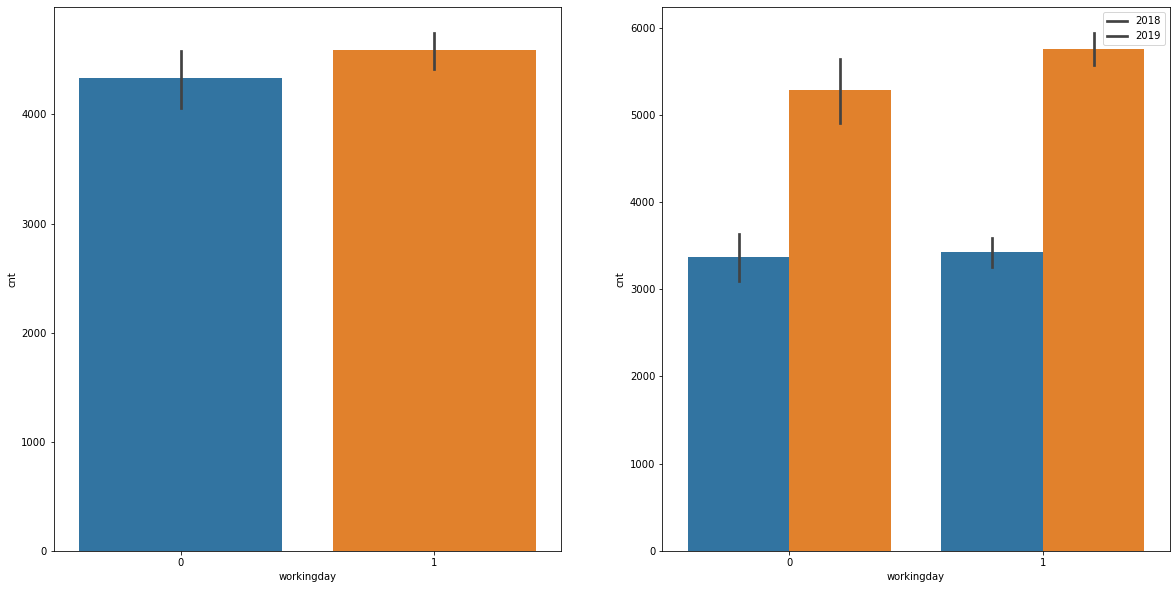

In [33]:
cat_plot('workingday',20,10)

<div class="alert alert-block alert-info">
<b>Insights</b> </br>
- Almost 70% of the bookings are done on Workingday rather than of on off days.
</div>

In [34]:
get_stats('weathersit')

,sum,mean,median,count,percentage,occurence
weathersit,,,,,,
Clear,2257952,4876.79,4844.0,463,68.61,63.42
Mist,995024,4044.81,4043.0,246,30.24,33.70
Snow,37869,1803.29,1817.0,21,1.15,2.88


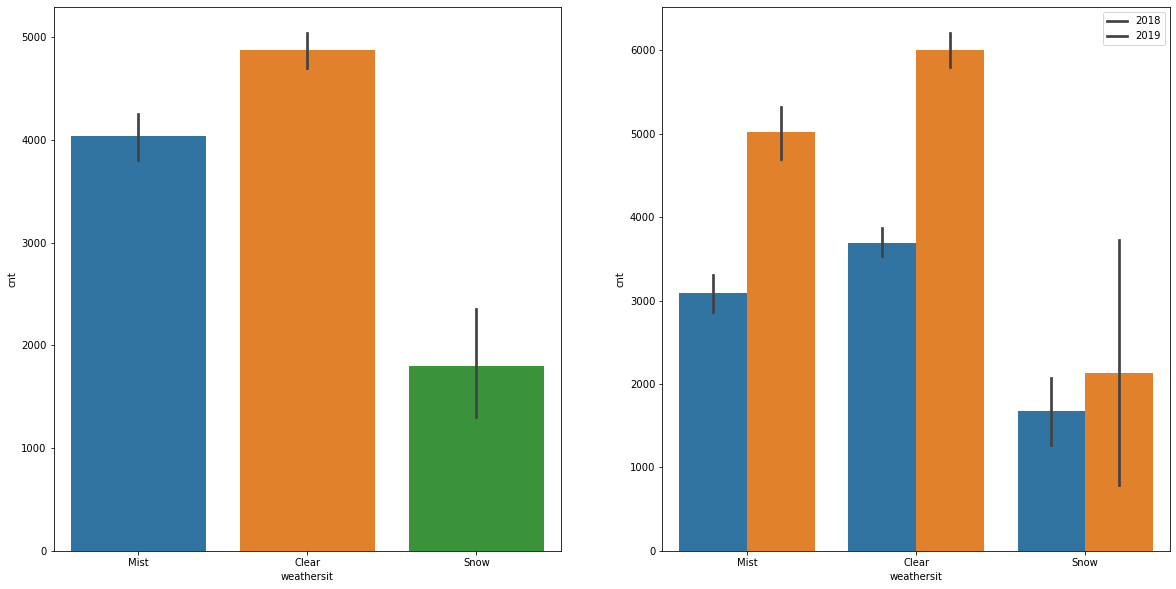

In [35]:
cat_plot('weathersit',20,10)

<div class="alert alert-block alert-info">
<b>Insights</b> </br>
- Almost 69% of bookings are done in clear weather with a median of 4800 bookings
</div>

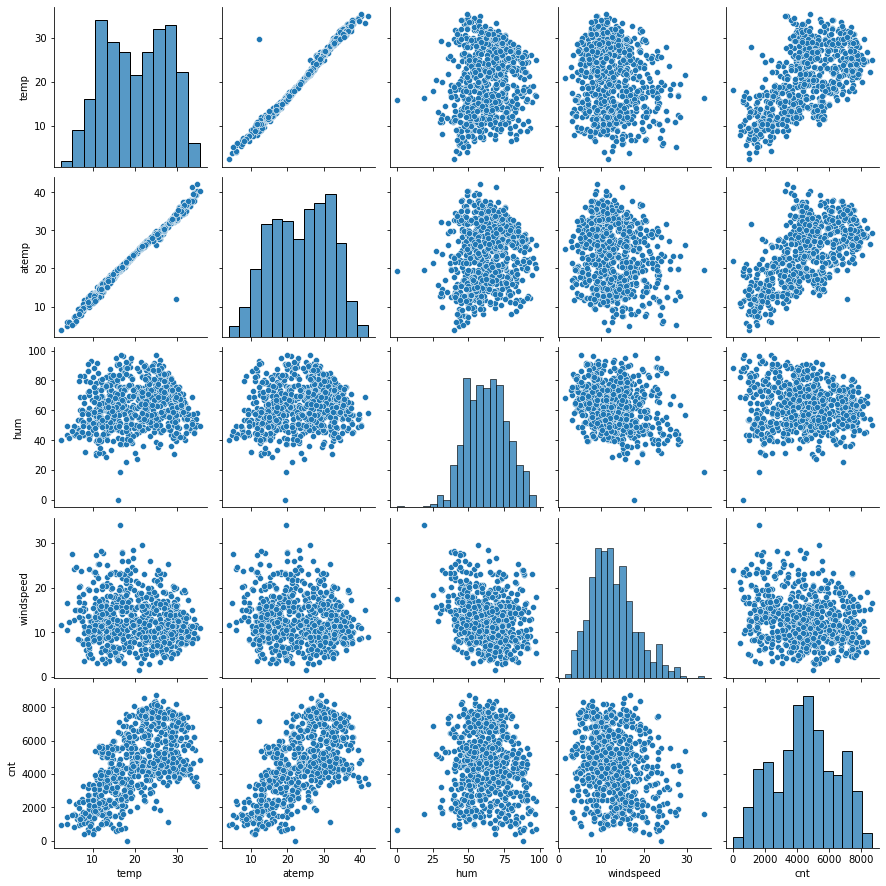

In [36]:
cols = ['temp','atemp','hum','windspeed','cnt']
sns.pairplot(df[cols])
plt.show()

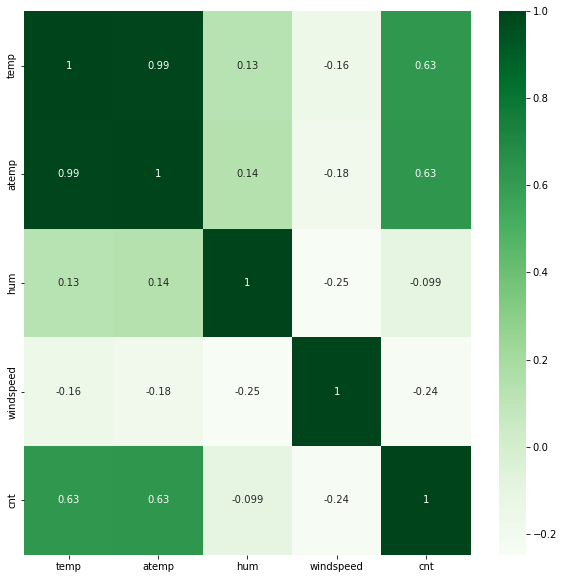

In [37]:
plt.figure(figsize=(10,10))
sns.heatmap(df[cols].corr(),annot=True,cmap = 'Greens')
plt.show()

<div class="alert alert-block alert-info">
<b>Insights</b> </br>
- Column temp and atemp shows 0.99 correlation it may lead to multicollinearity, need to remove one of them and needed to be decided in future using VIF
</div>

## Step 3: Data Preparation

In [38]:
season = pd.get_dummies(df['season'],drop_first=True)
season.head()

,Spring,Summer,Winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [39]:
mnth = pd.get_dummies(df['mnth'],drop_first=True)
mnth.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [40]:
weekday = pd.get_dummies(df['weekday'],drop_first=True)
weekday.head()

,Mon,Sat,Sun,Thu,Tue,Wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [41]:
weathersit = pd.get_dummies(df['weathersit'],drop_first=True)
weathersit.head()

,Mist,Snow
0,1,0
1,1,0
2,0,0
3,0,0
4,0,0


<div class="alert alert-block alert-info">
<b>INFO</b> </br>
- Converting categorical dtypes columns to dummy variables
</div>

In [42]:
df = pd.concat([df,season,mnth,weathersit,weekday], axis = 1)
df.drop(['season','mnth','weathersit','weekday'],axis=1,inplace=True)
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mist,Snow,Mon,Sat,Sun,Thu,Tue,Wed
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,1,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,0,1


In [43]:
df.shape

(730, 30)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   atemp       730 non-null    float64
 5   hum         730 non-null    float64
 6   windspeed   730 non-null    float64
 7   cnt         730 non-null    int64  
 8   Spring      730 non-null    uint8  
 9   Summer      730 non-null    uint8  
 10  Winter      730 non-null    uint8  
 11  Aug         730 non-null    uint8  
 12  Dec         730 non-null    uint8  
 13  Feb         730 non-null    uint8  
 14  Jan         730 non-null    uint8  
 15  Jul         730 non-null    uint8  
 16  Jun         730 non-null    uint8  
 17  Mar         730 non-null    uint8  
 18  May         730 non-null    uint8  
 19  Nov         730 non-null    u

<div class="alert alert-block alert-info">
<b>INFO</b> </br>
Now we are left with 30 columns including our target variable cnt.
</div>

## Step 4: Splitting the Data into Training and Testing Sets

In [45]:
df_train,df_test = train_test_split(df,train_size=0.8,random_state=42)

In [46]:
df_train.shape

(584, 30)

In [47]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mist,Snow,Mon,Sat,Sun,Thu,Tue,Wed
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.511986,0.032534,0.672945,20.570363,24.034964,63.479921,12.485484,4546.361301,0.229452,0.250000,...,0.095890,0.085616,0.344178,0.032534,0.147260,0.143836,0.150685,0.147260,0.138699,0.138699
std,0.500285,0.177566,0.469540,7.477410,8.093767,14.230553,5.016805,1955.054331,0.420841,0.433384,...,0.294693,0.280037,0.475507,0.177566,0.354669,0.351224,0.358048,0.354669,0.345928,0.345928
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,14.081112,17.431300,52.668900,8.906243,3247.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,21.080847,25.236250,63.812500,11.666944,4572.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.957500,30.556150,73.494150,15.458374,6035.750000,0.000000,0.250000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.041700,28.292425,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [48]:
df_test.shape

(146, 30)

In [49]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mist,Snow,Mon,Sat,Sun,Thu,Tue,Wed
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.452055,0.013699,0.726027,19.314845,22.491751,59.906191,13.876161,4354.589041,0.315068,0.260274,...,0.041096,0.068493,0.308219,0.013699,0.130137,0.143836,0.116438,0.123288,0.157534,0.150685
std,0.499409,0.116637,0.447530,7.565464,8.286138,13.950791,5.742528,1856.461089,0.466142,0.440294,...,0.199195,0.253460,0.463347,0.116637,0.337612,0.352131,0.321854,0.329899,0.365558,0.358973
min,0.000000,0.000000,0.000000,3.993043,5.896500,18.791700,3.167425,1263.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,12.879340,15.616925,50.104200,9.385645,2717.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,18.330424,21.905950,58.416650,13.437822,4395.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,26.222903,29.743088,69.366875,16.177786,5806.750000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,34.030000,39.741450,97.250000,34.000021,8555.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [50]:
scaler = MinMaxScaler()

<b>INFO</b> </br>
- Rescaling the features: it is extremely important to rescale the variables so that they have a comparable scale.

In [51]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mist,Snow,Mon,Sat,Sun,Thu,Tue,Wed
247,0,1,0,27.606653,31.28230,79.0417,14.250632,3351,0,0,...,0,1,1,0,1,0,0,0,0,0
335,0,0,1,12.880847,16.57165,62.5833,6.750518,3940,0,0,...,0,0,0,0,0,0,0,0,0,0
702,1,0,1,19.509153,23.45270,73.3750,11.666643,6606,0,0,...,0,0,0,0,0,0,0,0,1,0
440,1,0,0,21.080847,25.25230,75.5833,7.417168,7836,1,0,...,0,0,1,0,0,1,0,0,0,0
136,0,0,1,23.028347,26.92645,83.7917,18.582718,4123,0,1,...,0,0,1,0,0,0,0,0,1,0


In [52]:
cols = ['temp','atemp','hum','windspeed','cnt']
df_train[cols] = scaler.fit_transform(df_train[cols])

In [53]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mist,Snow,Mon,Sat,Sun,Thu,Tue,Wed
247,0,1,0,0.765327,0.717455,0.814513,0.475900,0.382996,0,0,...,0,1,1,0,1,0,0,0,0,0
335,0,0,1,0.317788,0.331261,0.644911,0.195963,0.450759,0,0,...,0,0,0,0,0,0,0,0,0,0
702,1,0,1,0.519232,0.511907,0.756118,0.379454,0.757478,0,0,...,0,0,0,0,0,0,0,0,1,0
440,1,0,0,0.566998,0.559152,0.778874,0.220845,0.898988,1,0,...,0,0,1,0,0,1,0,0,0,0
136,0,0,1,0.626185,0.603102,0.863461,0.637592,0.471813,0,1,...,0,0,1,0,0,0,0,0,1,0


In [54]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mist,Snow,Mon,Sat,Sun,Thu,Tue,Wed
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,...,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,0.511986,0.032534,0.672945,0.551484,0.527193,0.654151,0.410017,0.520520,0.229452,0.250000,...,0.095890,0.085616,0.344178,0.032534,0.147260,0.143836,0.150685,0.147260,0.138699,0.138699
std,0.500285,0.177566,0.469540,0.227249,0.212483,0.146644,0.187249,0.224926,0.420841,0.433384,...,0.294693,0.280037,0.475507,0.177566,0.354669,0.351224,0.358048,0.354669,0.345928,0.345928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354266,0.353829,0.542745,0.276424,0.371088,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.566998,0.558730,0.657578,0.379465,0.523527,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.745598,0.698392,0.757346,0.520978,0.691872,0.000000,0.250000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


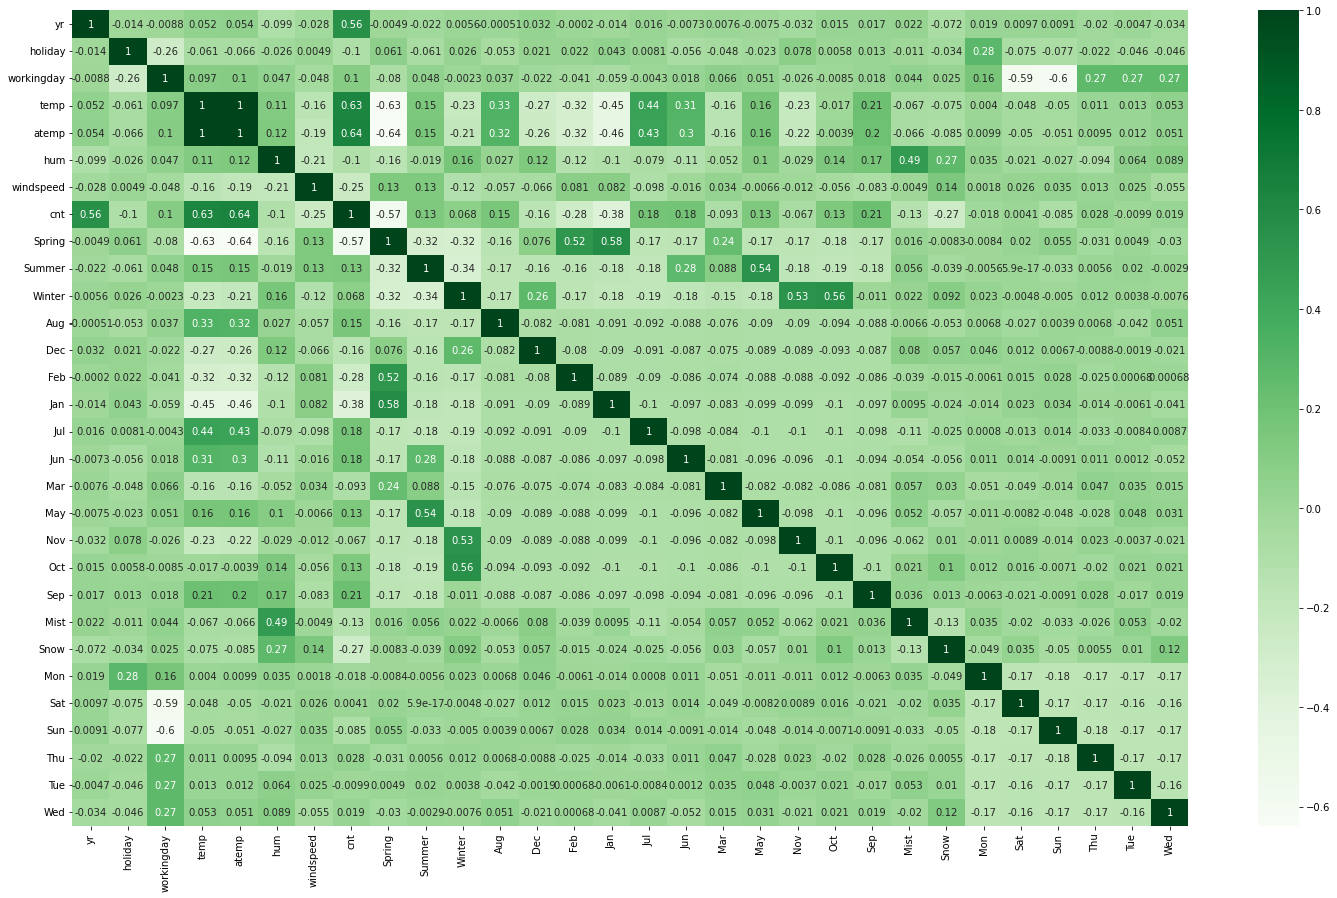

In [55]:
plt.figure(figsize=(25,15))
sns.heatmap(df_train.corr(),annot=True,cmap="Greens")
plt.show()

### Dividing into X and Y sets for the model building

In [56]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model


<div class="alert alert-block alert-info">
<b>INFO</b> </br>
Using RFE to eliminate half features from the train set
</div>

In [57]:
lr = LinearRegression()
lr.fit(X_train,y_train)

rfe = RFE(lr,verbose=1)
rfe = rfe.fit(X_train,y_train)

Fitting estimator with 29 features.
Fitting estimator with 28 features.
Fitting estimator with 27 features.
Fitting estimator with 26 features.
Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.


In [58]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', False, 3),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Spring', True, 1),
 ('Summer', False, 8),
 ('Winter', True, 1),
 ('Aug', False, 12),
 ('Dec', True, 1),
 ('Feb', False, 14),
 ('Jan', False, 10),
 ('Jul', False, 2),
 ('Jun', False, 15),
 ('Mar', False, 5),
 ('May', False, 6),
 ('Nov', True, 1),
 ('Oct', False, 7),
 ('Sep', True, 1),
 ('Mist', False, 4),
 ('Snow', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thu', False, 13),
 ('Tue', False, 11),
 ('Wed', False, 16)]

In [59]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Dec', 'Nov', 'Sep', 'Snow', 'Sat', 'Sun'],
      dtype='object')

<div class="alert alert-block alert-info">
<b>INFO</b> </br>
Using RFE we got 14 features namely 'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Dec', 'Nov', 'Sep', 'Snow', 'Sat', 'Sun'
</div>

In [60]:
X_train.columns[~rfe.support_]

Index(['temp', 'Summer', 'Aug', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Oct', 'Mist', 'Mon', 'Thu', 'Tue', 'Wed'],
      dtype='object')

In [61]:
X_train_rfe = X_train[col]

### MODEL 1

In [62]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [63]:
lm_1 = sm.OLS(y_train,X_train_rfe).fit() 

In [64]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.08e-207
Time:                        16:11:57   Log-Likelihood:                 555.11
No. Observations:                 584   AIC:                            -1082.
Df Residuals:                     570   BIC:                            -1021.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3243      0.026     12.518      0.0

<div class="alert alert-block alert-info">
<b>INFO</b> </br>
Trained MLR using the Features: 'yr', 'holiday', 'workingday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Dec', 'Nov', 'Sep', 'Snow', 'Sat', 'Sun'
</div>

In [65]:
# Function to calculate VIF
def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [66]:
calculateVIF(X_train_rfe)

,Features,VIF
2,holiday,inf
3,workingday,inf
13,Sat,inf
14,Sun,inf
4,atemp,2.89
7,Spring,2.77
8,Winter,2.18
10,Nov,1.67
9,Dec,1.29
5,hum,1.25


In [67]:
X_train_rfe = X_train_rfe.drop('holiday',axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Dec', 'Nov', 'Sep', 'Snow', 'Sat', 'Sun'],
      dtype='object')

<div class="alert alert-block alert-info">
<b>INFO</b> </br>
Dropping column holiday since it has VIF of Infinity and P value of all the column is acceptable
</div>

### MODEL 2

In [68]:
lm_2 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     209.3
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          4.08e-207
Time:                        16:11:58   Log-Likelihood:                 555.11
No. Observations:                 584   AIC:                            -1082.
Df Residuals:                     570   BIC:                            -1021.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3557      0.039      9.203      0.0

<div class="alert alert-block alert-info">
<b>INFO</b> </br>
Trained MLR using the Features: 'yr', 'workingday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Dec', 'Nov', 'Sep', 'Snow', 'Sat', 'Sun'
</div>

In [69]:
calculateVIF(X_train_rfe)

,Features,VIF
0,const,97.37
2,workingday,7.21
13,Sun,4.83
12,Sat,4.70
3,atemp,2.89
6,Spring,2.77
7,Winter,2.18
9,Nov,1.67
8,Dec,1.29
4,hum,1.25


In [70]:
X_train_rfe = X_train_rfe.drop('Sun',axis=1)
X_train_rfe.columns

Index(['const', 'yr', 'workingday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Dec', 'Nov', 'Sep', 'Snow', 'Sat'],
      dtype='object')

<div class="alert alert-block alert-info">
<b>INFO</b> </br>
Dropped column Sun as it has high p-value of 0.141
</div>

### MODEL 3

In [71]:
lm_3 = sm.OLS(y_train,X_train_rfe).fit() 
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     226.1
Date:                Wed, 15 Dec 2021   Prob (F-statistic):          7.83e-208
Time:                        16:11:58   Log-Likelihood:                 554.00
No. Observations:                 584   AIC:                            -1082.
Df Residuals:                     571   BIC:                            -1025.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3853      0.033     11.634      0.0

<div class="alert alert-block alert-info">
<b>INFO</b> </br>
Trained MLR using the Features: 'yr', 'workingday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Dec', 'Nov', 'Sep', 'Snow', 'Sat'
</div>

In [72]:
calculateVIF(X_train_rfe)

,Features,VIF
0,const,71.31
3,atemp,2.89
6,Spring,2.76
7,Winter,2.18
9,Nov,1.66
2,workingday,1.55
12,Sat,1.54
8,Dec,1.29
4,hum,1.25
5,windspeed,1.16


<div class="alert alert-block alert-info">
<b>INFO</b> </br>
No further feature elimination is required as all P and VIF values are acceptable
</div>

In [73]:
lm_3.params

const         0.385255
yr            0.224247
workingday    0.046505
atemp         0.425314
hum          -0.251472
windspeed    -0.136941
Spring       -0.139546
Winter        0.086837
Dec          -0.066279
Nov          -0.079521
Sep           0.065155
Snow         -0.196867
Sat           0.058043
dtype: float64

<div class="alert alert-block alert-success">
Final Equation of the Linear Regression Model is: </br>
cnt = 0.385255*const + 0.224247*yr + 0.046505*workingday + (-0.251472*hum) + (-0.136941*windspeed) + (-0.139546*Spring) + 0.086837*winter + (-0.066279*Dec) + (-0.079521*Nov) + 0.065155*Sep + (-0.196867*Snow) + 0.058043*Sat
</div>

<div class="alert alert-block alert-info">
<b>After the equation we can conclude that</b> </br>

<b> yr </b>: Change in one unit of yr changes 0.224247 units of cnt assuming that all the other variable states constant </br>

<b> workingday </b>: Change in one unit of workingday changes 0.046505 units of cnt assuming that all the other variable states constant </br>

<b> atemp </b>: Change in one unit of atemp changes 0.425314 units of cnt assuming that all the other variable states constant </br>

<b> hum </b>: Change in one unit of hum changes -0.251472 units of cnt assuming that all the other variable states constant </br>

<b> windspeed </b>: Change in one unit of windspeed changes -0.136941 units of cnt assuming that all the other variable states constant </br>

<b> Spring </b>: Change in one unit of Spring changes -0.139546 units of cnt assuming that all the other variable states constant </br>

<b> Winter </b>: Change in one unit of Winter changes 00.86837 units of cnt assuming that all the other variable states constant </br>

<b> Dec </b>: Change in one unit of Dec changes -0.066279 units of cnt assuming that all the other variable states constant </br>

<b> Nov </b>: Change in one unit of Nov changes -0.079521 units of cnt assuming that all the other variable states constant </br>

<b> Sep </b>: Change in one unit of Sep changes 0.065155 units of cnt assuming that all the other variable states constant </br>

<b> Snow </b>: Change in one unit of Snow changes -0.196867 units of cnt assuming that all the other variable states constant </br>

<b> Sat </b>: Change in one unit of Sat changes 0.058043 units of cnt assuming that all the other variable states constant </br>

</div>

## Step 6: Residual Analysis and Checking Assumptions

In [74]:
y_train_pred = lm_3.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

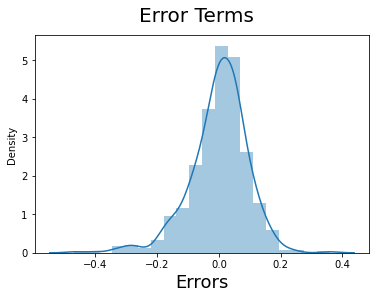

In [75]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

<div class="alert alert-block alert-info">
<b>Normality of Error</b></br>
From the above distplot we can clearly see that the mean of error term is near to Zero
</div>

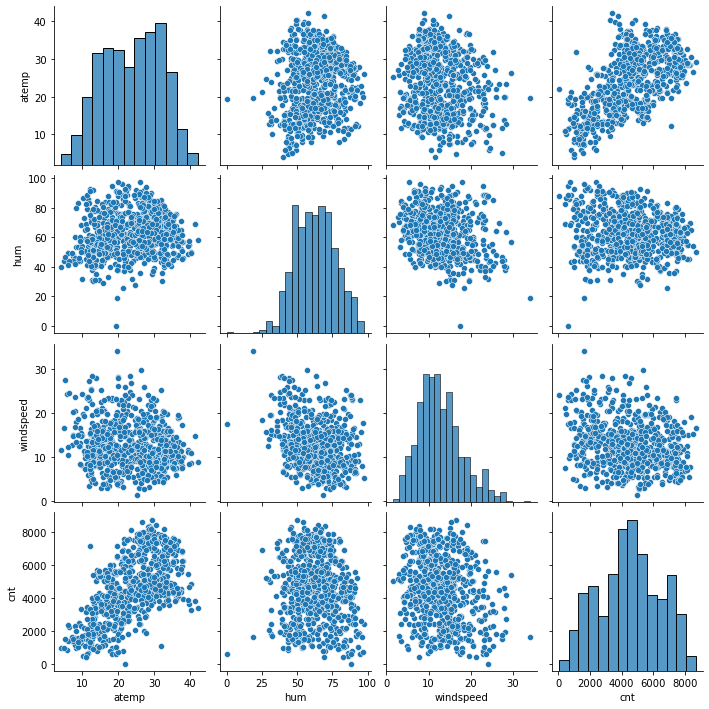

In [76]:
cols = ['atemp','hum','windspeed','cnt']
sns.pairplot(df[cols])

<div class="alert alert-block alert-info">
<b>Linear Relationship</b></br>
From the above pairplot we can clearly see that the independent variable have some kind linear relationship with cnt
</div>

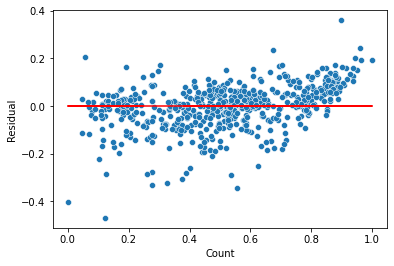

In [77]:
y_train_pred = lm_3.predict(X_train_rfe)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

<div class="alert alert-block alert-info">
<b>Homoscedasticity</b></br>
From the above plot we can clearly see that there is no visible pattern in the residual values
</div>

In [78]:
calculateVIF(X_train_rfe)

,Features,VIF
0,const,71.31
3,atemp,2.89
6,Spring,2.76
7,Winter,2.18
9,Nov,1.66
2,workingday,1.55
12,Sat,1.54
8,Dec,1.29
4,hum,1.25
5,windspeed,1.16


<AxesSubplot:>

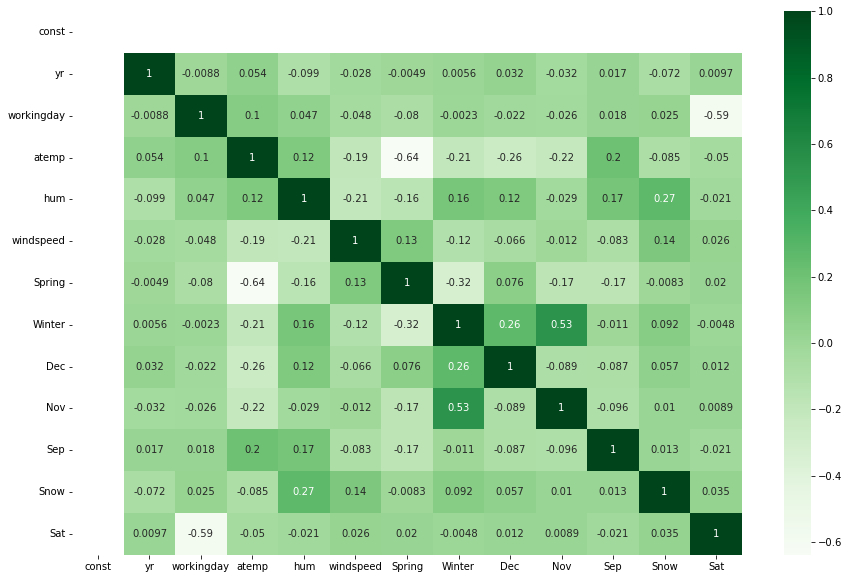

In [79]:
plt.figure(figsize=(15,10))
sns.heatmap(X_train_rfe.corr(),annot=True,cmap="Greens")

<div class="alert alert-block alert-info">
<b>No Multicolinearity</b></br>
From the above heatmap and VIF values we can clearly see that there is correlation between independent variables
</div>

## Step 7: Model Evaluation

In [80]:
cols = ['temp','atemp','hum','windspeed','cnt']
df_test[cols] = scaler.transform(df_test[cols])

In [81]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,Oct,Sep,Mist,Snow,Mon,Sat,Sun,Thu,Tue,Wed
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,0.452055,0.013699,0.726027,0.513327,0.486680,0.617324,0.461923,0.498457,0.315068,0.260274,...,0.041096,0.068493,0.308219,0.013699,0.130137,0.143836,0.116438,0.123288,0.157534,0.150685
std,0.499409,0.116637,0.447530,0.229925,0.217533,0.143761,0.214336,0.213583,0.466142,0.440294,...,0.199195,0.253460,0.463347,0.116637,0.337612,0.352131,0.321854,0.329899,0.365558,0.358973
min,0.000000,0.000000,0.000000,0.047675,0.051010,0.193646,0.062226,0.142775,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.317742,0.306197,0.516316,0.294317,0.310084,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.483409,0.471301,0.601975,0.445562,0.503164,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.723272,0.677047,0.714815,0.547829,0.665526,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,0.960541,0.939531,1.002146,1.213032,0.981707,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
y_test = df_test.pop('cnt')
X_test = df_test

In [83]:
X_test_sm = sm.add_constant(X_test)

In [84]:
X_test_sm = X_test_sm.drop(['temp', 'Summer', 'Aug', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May',
       'Oct', 'Mist', 'Mon', 'Thu', 'Tue', 'Wed', 'holiday','Sun'],axis = 1)

In [85]:
X_test_sm.columns

Index(['const', 'yr', 'workingday', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'Dec', 'Nov', 'Sep', 'Snow', 'Sat'],
      dtype='object')

In [86]:
y_pred = lm_3.predict(X_test_sm)

Text(0, 0.5, 'y_pred')

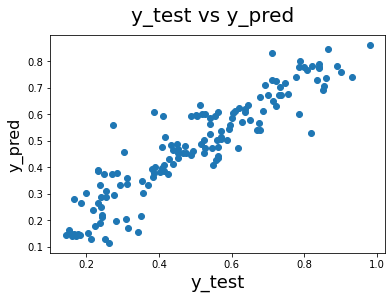

In [87]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [88]:
r2 = r2_score(y_test, y_pred)

In [89]:
print(r2)

0.833680620820433


<div class="alert alert-block alert-info">
<b>R-squared Score</b></br>
We get R-squared score of 0.833
</div>

In [90]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7921007760255413

<div class="alert alert-block alert-info">
<b>Adjusted R-Squared Score</b></br>
We get an adjusted R-squared score of 0.792
</div>


Metrics | Train | Test
---------|----------|---------
R-Squared | 0.826 | 0.833
Adjusted R-Squared | 0.822 | 0.792
